In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from flarestack.data.public import icecube_ps_3_year
print(icecube_ps_3_year.get_seasons())

{'IC79-2010': <flarestack.data.public.icecube.PublicICSeason object at 0x11fe91240>, 'IC86-2011': <flarestack.data.public.icecube.PublicICSeason object at 0x11fe9b908>, 'IC86-2012': <flarestack.data.public.icecube.PublicICSeason object at 0x11fe9b8d0>}


In [2]:
ic86_2011 = icecube_ps_3_year.seasons["IC86-2011"]
print(ic86_2011)

In [3]:
exp_data = ic86_2011.get_exp_data()
print(exp_data.dtype.names)
print(exp_data)

('ra', 'dec', 'logE', 'sigma', 'time', 'sinDec', 'raw_sigma')
[(4.23461382, -0.39490169, 4.5508, 0.00349066, 55694.99190987, -0.38471744, 0.00268955)
 (4.8018947 ,  0.68259303, 2.9629, 0.01568178, 55694.99825263,  0.63080718, 0.01568178)
 (1.61364241,  0.08201302, 2.8691, 0.00839678, 55695.00023208,  0.08192111, 0.00839678)
 ...
 (4.19143263,  0.90237537, 2.7867, 0.05283286, 56062.4089819 ,  0.78480125, 0.05283286)
 (4.29163897,  0.6465293 , 3.4172, 0.01287878, 56062.41103019,  0.6024198 , 0.01287878)
 (6.05525752,  1.171184  , 2.8363, 0.00349066, 56062.41621634,  0.92121189, 0.00240157)]


We can plot the distribution of events as a function of declination. Due to IceCube's position at the south pole, and the fact that the Earth rotates, we expect uniformity in right ascension. Under the assumption that the data sample is background-dominated (as it is expected to contain <~0.1% astrophysical neutrinos), we can model our background using the experimental data. A 

Text(0.5, 1.0, 'Normalised data rate as a function of delination')

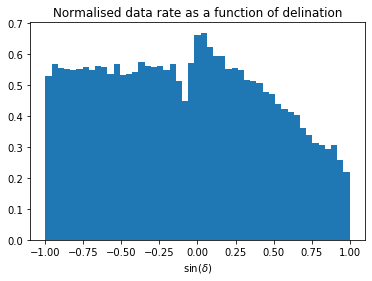

In [4]:
plt.hist(np.sin(exp_data["dec"]), bins=ic86_2011.sin_dec_bins, density=True)
plt.xlabel(r"sin($\delta$)")
plt.title("Normalised data rate as a function of delination")

The public datasets also include effective areas, binned in Neutrino Energy and sin(declination). We can fit a spline to these, to give a continuous function. Areas for which the effective area is zero are set to 10^-7, giving a continuous function in log space.

Saving to /Users/avocado/flarestack__data/output/dataset_plots/effective_area_plots/all_sky_3_year/IC86-2011.pdf


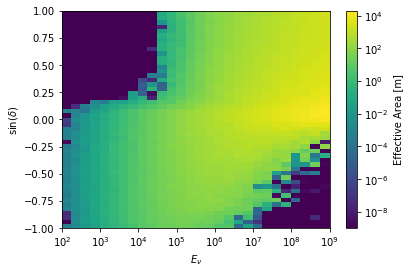

In [5]:
ic86_2011.plot_effective_area(show=True)

The effective areas are given in terms of true neutrino energy. However, we cannot directly measure this quantity. Instead, IceCube uses "Energy Proxy" values which are, on average,  broadly correlated to true energies. However, it is important to understad how these can be converted. We expect that, in the northern hemisphere, the background is dominated by atmospheric neutrinos, which approximately follow an $E^{-3.7}$ spectrum. However, in the southern hemisphere (with downgoing events), the dominant background is instead muon bundles which will not follow the same spectrum. we focus on the more simple northern hemisphere events for the energy proxy conversion.

Saving to /Users/avocado/flarestack__data/output/dataset_plots/energy_proxy_map/all_sky_3_year/IC86-2011-Upgoing.pdf


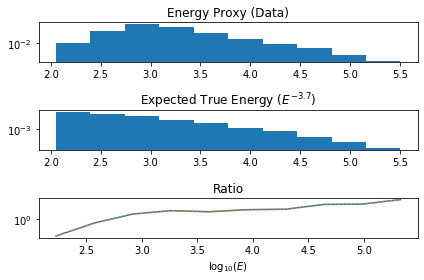

Saving converted numpy array to /Users/avocado/flarestack__data/input/energy_proxy_weighting/all_sky_3_year/IC86-2011.pkl


In [6]:
ic86_2011.map_energy_proxy(show=True)

We see that lower energies are underrepresented, and this lower-energy neutrinos that make it into our data sample have overestimated energy proxies. This is exactly what one might expect, because the muon energy estimator produces a spread in energy estimates, and we would be biased towards selecting those with overestimated energies.

We can attempt to account for this information when constructing energy PDFs. We assume that the central estimate broadly corresponds to neutrino energy. (Actually, it more exactly should correspond to muon energy, giving a lower bound on neutrino energy.) Nonetheless, it still provides significant ability to distinguish signal and background.

We can first look at the distribution of energy proxies over the sky that is found in our data. As before, given that the dataset is background-dominated, it can be considered to approximately describe the background distribution. 